In [44]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('bestsellers with categories.csv')
print(df.head())
df.shape

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


(550, 7)

In [45]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

# Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)Чи є в якихось змінних пропуски? (Так / ні) Відповідь - ні

In [46]:
missing_data = df.isna().sum()
print(missing_data)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [47]:
unique_genres = df['genre'].unique()
print(unique_genres)

['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

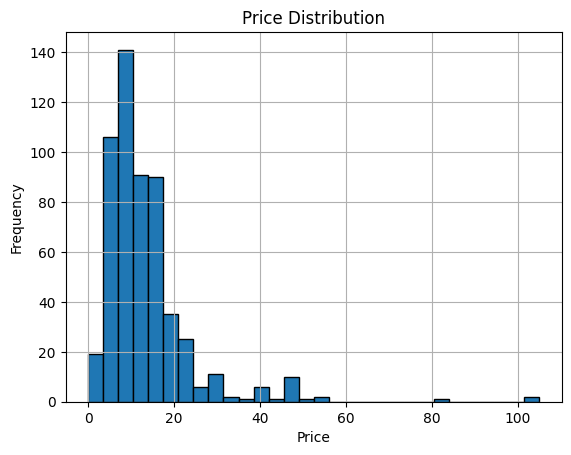

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.10
Медіанна ціна: 11.00


In [48]:
df['price'].hist(bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()


print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price:.2f}")
print(f"Медіанна ціна: {median_price:.2f}")
     

# Пошук та сортування даних

Який рейтинг у датасеті найвищий?

In [49]:
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг: {max_rating}")

Найвищий рейтинг: 4.9


Скільки книг мають такий рейтинг?

In [50]:
unique_books = df.drop_duplicates(subset=['name'])
num_books_with_max_rating = (unique_books['user_rating'] == max_rating).sum()
print(f"Кількість книг з найвищим рейтингом ({max_rating}): {num_books_with_max_rating}")

Кількість книг з найвищим рейтингом (4.9): 28


Яка книга має найбільше відгуків?

In [51]:
index_max_reviews = df['reviews'].idxmax()
book_with_max_reviews = df.loc[index_max_reviews, 'name']
print(f"Книга з найбільшою кількістю відгуків: {book_with_max_reviews}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [52]:
df_2015 = df[df['year'] == 2015]
sorted_df_2015 = df_2015.sort_values(by='user_rating', ascending=False)
top_50_2015 = sorted_df_2015.head(50)
index_max_price = top_50_2015['price'].idxmax()
most_expensive_book = top_50_2015.loc[index_max_price, 'name']
print(f"Найдорожча книга серед Топ-50 у 2015 році: {most_expensive_book}")

Найдорожча книга серед Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [53]:
fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
num_books_fiction_top_50_2010 = fiction_top_50_2010.shape[0]
print("Кількість книг жанру 'Fiction' у Топ-50 у 2010 році:", num_books_fiction_top_50_2010)

Кількість книг жанру 'Fiction' у Топ-50 у 2010 році: 20


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [54]:
books_rating_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
num_books_rating_4_9_2010_2011 = books_rating_4_9_2010_2011.shape[0]
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", num_books_rating_4_9_2010_2011)

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [55]:
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015_under_8 = books_2015_under_8.sort_values(by='price')
print(sorted_books_2015_under_8)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

Яка книга остання у відсортованому списку?

In [56]:
last_book = sorted_books_2015_under_8.iloc[-1]
print(last_book)

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


# Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [57]:
max_min_prices_by_genre = df.groupby('genre').agg({'price': ['max', 'min']})
print(max_min_prices_by_genre)

            price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0


Максимальна ціна для жанру Fiction: Відповідь

In [58]:
max_price_fiction = max_min_prices_by_genre.loc['Fiction', ('price', 'max')]
print("Максимальна ціна для жанру Fiction:", max_price_fiction)

Максимальна ціна для жанру Fiction: 82


Мінімальна ціна для жанру Fiction: Відповідь

In [59]:
min_price_fiction = max_min_prices_by_genre.loc['Fiction', ('price', 'min')]
print("Мінімальна ціна для жанру Fiction:", min_price_fiction)

Мінімальна ціна для жанру Fiction: 0


Максимальна ціна для жанру Non Fiction: Відповідь

In [60]:
max_price_non_fiction = max_min_prices_by_genre.loc['Non Fiction', ('price', 'max')]
print("Максимальна ціна для жанру Non Fiction:", max_price_non_fiction)

Максимальна ціна для жанру Non Fiction: 105


Мінімальна ціна для жанру Non Fiction: Відповідь

In [61]:
min_price_non_fiction = max_min_prices_by_genre.loc['Non Fiction', ('price', 'min')]
print("Мінімальна ціна для жанру Non Fiction:", min_price_non_fiction)

Мінімальна ціна для жанру Non Fiction: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [62]:
unique_books = df.drop_duplicates(subset=['name'])
author_books_count = unique_books.groupby('author')['name'].count().reset_index()
author_books_count.rename(columns={'name': 'book count'}, inplace=True)
print(author_books_count)

                         author  book count
0              Abraham Verghese           1
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           2
244               William Davis           1
245            William P. Young           1
246            Wizards RPG Team           1
247                Zhi Gang Sha           2

[248 rows x 2 columns]


Якої розмірності вийшла таблиця? Відповідь:

In [63]:
author_books_count.shape

(248, 2)

Який автор має найбільше книг? Відповідь: Скільки книг цього автора?

In [64]:
max_books_author_index = author_books_count['book count'].idxmax()
author_with_most_books = author_books_count.loc[max_books_author_index, 'author']
author_books_c = author_books_count.loc[max_books_author_index, 'book count']
print(f"Автор з найбільшою кількістю книг: {author_with_most_books} має {author_books_c} книг")

Автор з найбільшою кількістю книг: Jeff Kinney має 12 книг


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [65]:
average_rating_per_author = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
average_rating_per_author.columns = ['author', 'average rating']
print(average_rating_per_author)


                         author  average rating
0              Abraham Verghese        4.600000
1                Adam Gasiewski        4.400000
2                 Adam Mansbach        4.800000
3                     Adir Levy        4.800000
4    Admiral William H. McRaven        4.700000
..                          ...             ...
243             Walter Isaacson        4.566667
244               William Davis        4.400000
245            William P. Young        4.600000
246            Wizards RPG Team        4.800000
247                Zhi Gang Sha        4.600000

[248 rows x 2 columns]


У якого автора середній рейтинг мінімальний? Відповідь: Який у цього автора середній рейтинг?

In [66]:
author_with_min_avg_rating = average_rating_per_author.loc[average_rating_per_author['average rating'].idxmin()]
print(author_with_min_avg_rating)

author            Donna Tartt
average rating            3.9
Name: 71, dtype: object


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [67]:
result = pd.merge(author_books_count, average_rating_per_author, on='author')
result.set_index('author', inplace=True)
print(result)

                            book count  average rating
author                                                
Abraham Verghese                     1        4.600000
Adam Gasiewski                       1        4.400000
Adam Mansbach                        1        4.800000
Adir Levy                            1        4.800000
Admiral William H. McRaven           1        4.700000
...                                ...             ...
Walter Isaacson                      2        4.566667
William Davis                        1        4.400000
William P. Young                     1        4.600000
Wizards RPG Team                     1        4.800000
Zhi Gang Sha                         2        4.600000

[248 rows x 2 columns]


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [68]:
sorted_result = result.sort_values(by=['book count', 'average rating'], ascending=[True, True])
print(sorted_result)

                 book count  average rating
author                                     
Donna Tartt               1        3.900000
Gallup                    1        4.000000
Gillian Flynn             1        4.000000
Muriel Barbery            1        4.000000
Chris Cleave              1        4.100000
...                     ...             ...
Bill O'Reilly             6        4.642857
Dav Pilkey                6        4.900000
Stephenie Meyer           7        4.657143
Rick Riordan             10        4.772727
Jeff Kinney              12        4.800000

[248 rows x 2 columns]


Який автор перший у списку?

In [69]:
first_author = sorted_result.head(1)
print(first_author)

             book count  average rating
author                                 
Donna Tartt           1             3.9


Побудувати діаграму залежності price від рейтингу перших 10 топ книжок за 2015 р

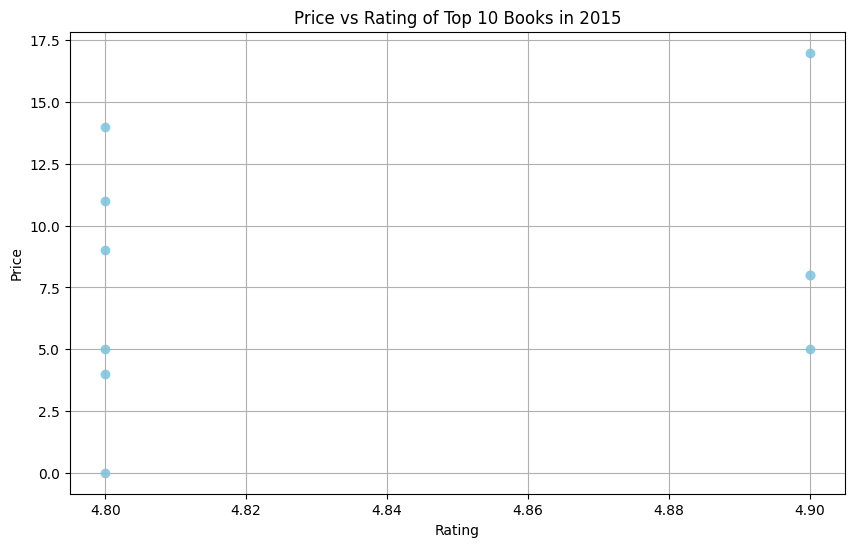

In [70]:
books_2015 = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False)
top_10_books_2015 = books_2015.head(10)
plt.figure(figsize=(10, 6))
plt.scatter(top_10_books_2015['user_rating'], top_10_books_2015['price'], color='skyblue')

plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price vs Rating of Top 10 Books in 2015')
plt.grid(True)
plt.show()

Створити таблицю популярності авторів у 2010 році по рейтингу з використанням seaborn

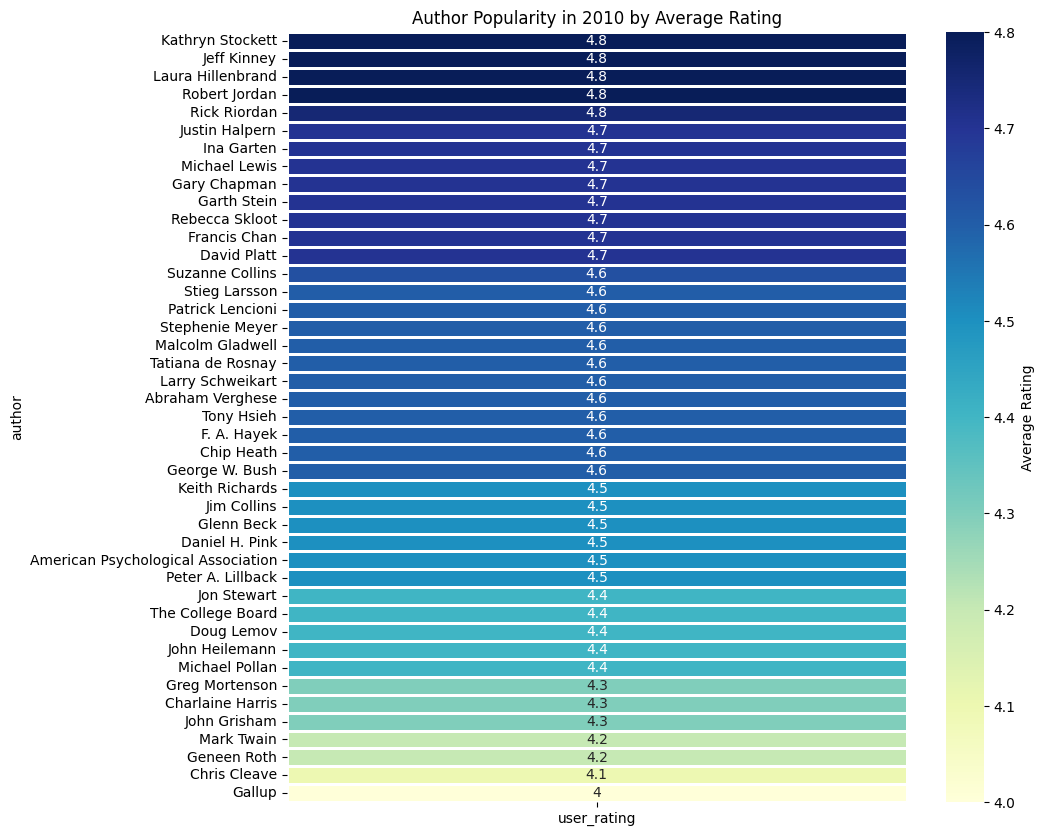

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
df_2010 = df[df['year'] == 2010]

author_ratings = df_2010.groupby('author')['user_rating'].mean().reset_index()
author_ratings.set_index('author', inplace=True)
author_ratings_pivot = author_ratings.pivot_table(index='author').sort_values(by='user_rating', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(author_ratings_pivot, annot=True, cmap='YlGnBu', linewidths=2, cbar_kws={'label': 'Average Rating'})
plt.title('Author Popularity in 2010 by Average Rating')
plt.show()

Кругова діаграма за 2015 рік 100 топ книжок з розподілом рейтингу

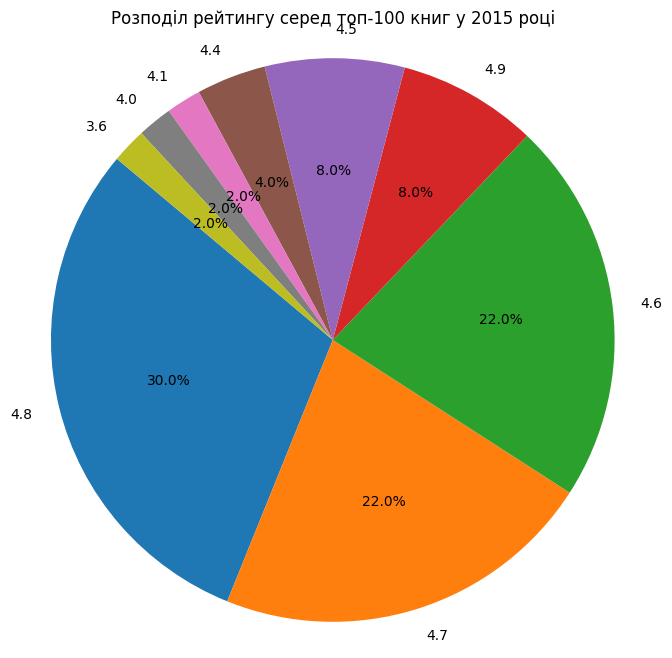

In [72]:
top_books_2015 = df[(df['year'] == 2015)].nlargest(100, 'user_rating')
rating_distribution = top_books_2015['user_rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл рейтингу серед топ-100 книг у 2015 році')
plt.axis('equal')
plt.show()